<a href="https://colab.research.google.com/github/cpeggy/EducationalDataMining/blob/main/week3_DataLoading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

金門縣政府提供教育相關數據

https://drive.google.com/drive/folders/1ZnEmLN_Gbx074-dv_8m3chn2vvhaeUSK?usp=sharing

金門縣myViewBoard_202406

https://docs.google.com/spreadsheets/d/1mOaEuhQMICf0GQ0rYi7alli72lpkueF4uETobvryguE/edit?usp=sharing

from google.colab import auth：

    這行程式從 Google Colab 模組中導入 auth 物件，用來進行用戶身份驗證。

auth.authenticate_user()：

    此行程式會彈出 Google 登錄對話框，要求用戶登錄他們的 Google 帳戶並授權此筆程式訪問 Google Drive API（包括 Google Sheets）。當用戶完成登錄後，會自動生成授權憑證，讓後續程式可以使用這些權限。

import gspread：

    gspread 是一個 Python 庫，用於通過 Google Sheets API 操作 Google Sheets，提供便捷的方式來讀取、寫入和操作表格數據。

from google.auth import default：

    這行導入了 default() 函數，這個函數會自動返回用戶的 Google API 認證憑證（Credentials）和專案資訊。通常在 Google Colab 環境中，它會自動找到當前使用者的默認憑證。

creds, _ = default()：

    此行程式調用 default() 函數，並將返回的憑證物件存入 creds 變數，這些憑證稍後將被用於進行 Google API 認證。

gc = gspread.authorize(creds)：

    這行將憑證 (creds) 授權給 gspread，這樣 gspread 就能夠通過已授權的 Google API 操作 Google Sheets。最終，gc 是一個 Google Sheets 客戶端物件，你可以用它來訪問並操作 Google Sheets 的內容。

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [3]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1tehy6m5sWsxBPO4dIaLeDnvebVXZYc9THRejITxXCLU/edit?usp=sharing')

In [4]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('All-canvas').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,Date,Windows session count,Windows total session min,Android session count,Android total session min,IOS session count,IOS total session min,Web session count,Web total session min,Classroom session count,Classroom total session min
0,2024-06-01,0,0,0,0,0,0,0,0,0,0
1,2024-06-02,1,2.25,0,0,0,0,0,0,0,0
2,2024-06-03,15,320.97,0,0,0,0,0,0,0,0
3,2024-06-04,9,126.9,0,0,0,0,0,0,0,0
4,2024-06-05,9,64.68,0,0,0,0,0,0,0,0


In [5]:
type(df['Windows total session min'][0])

str

In [11]:
df['Windows session count'] = df['Windows session count'].astype(float).astype(int)
df['Windows total session min'] = df['Windows total session min'].astype(float).astype(int)
df['Android session count'] = df['Android session count'].astype(float).astype(int)
df['Android total session min'] = df['Android total session min'].astype(float).astype(int)
df['IOS session count'] = df['IOS session count'].astype(float).astype(int)
df['IOS total session min'] = df['IOS total session min'].astype(float).astype(int)
df['Web session count'] = df['Web session count'].astype(float).astype(int)
df['Web total session min'] = df['Web total session min'].astype(float).astype(int)
df['Classroom session count'] = df['Classroom session count'].astype(float).astype(int)
df['Classroom total session min'] = df['Classroom total session min'].astype(float).astype(int)

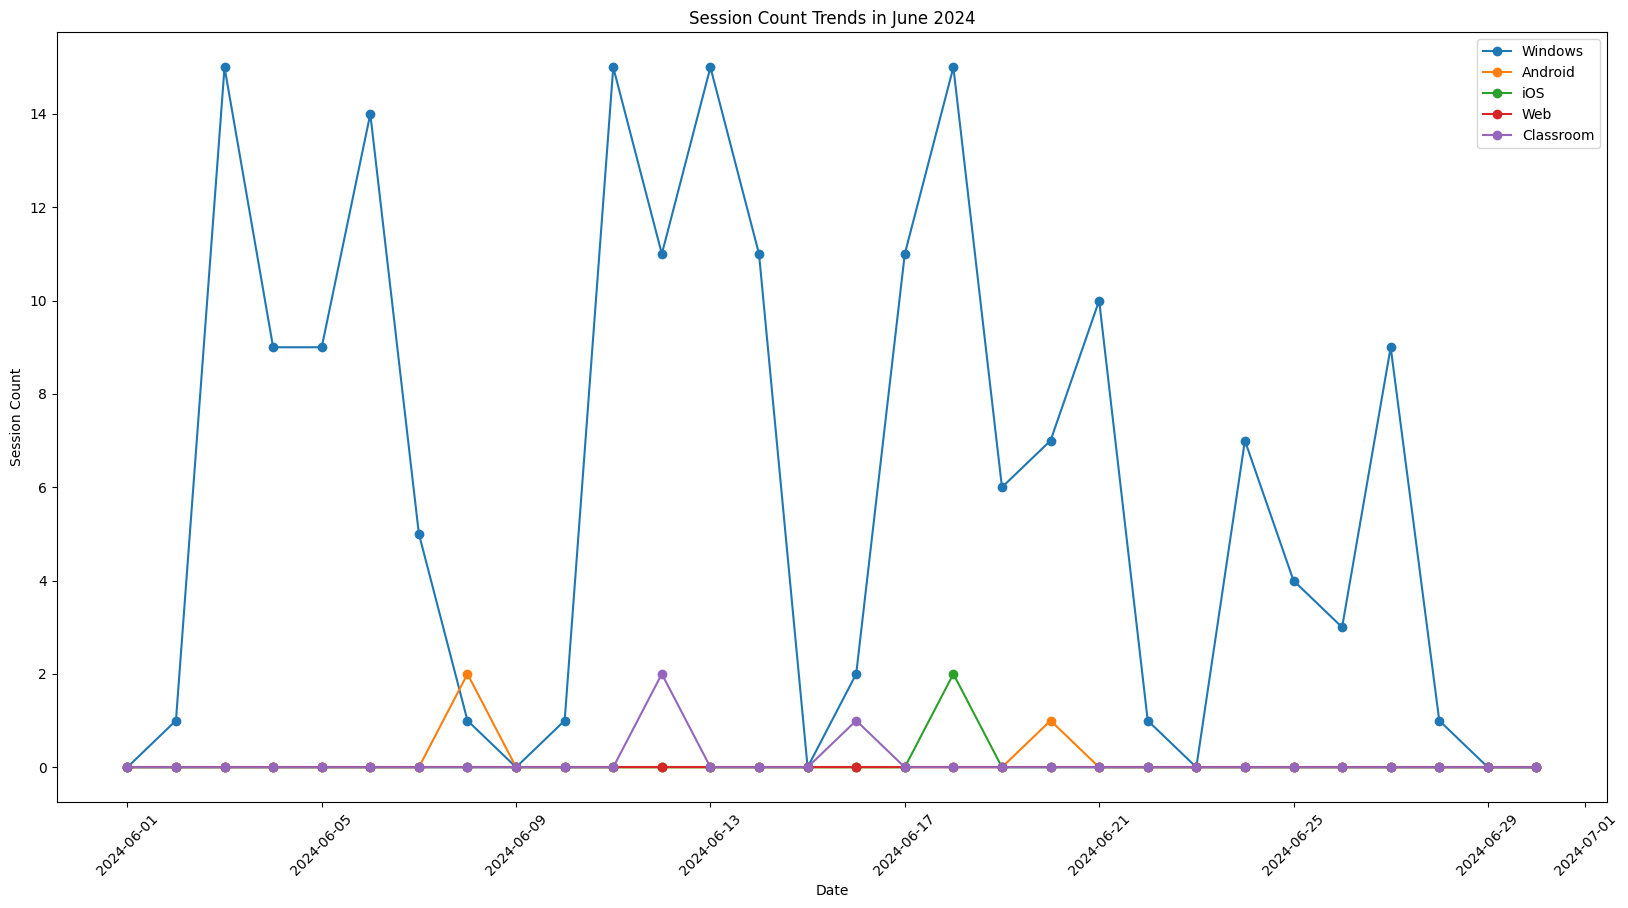

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# 確保 'Date' 欄位為 datetime 格式，以便時間序列繪圖
df['Date'] = pd.to_datetime(df['Date'])

# 建立圖表
plt.figure(figsize=(20, 10))

# 繪製不同平台的 session count 趨勢線
plt.plot(df['Date'], df['Windows session count'], marker='o', label='Windows')
plt.plot(df['Date'], df['Android session count'], marker='o', label='Android')
plt.plot(df['Date'], df['IOS session count'], marker='o', label='iOS')
plt.plot(df['Date'], df['Web session count'], marker='o', label='Web')
plt.plot(df['Date'], df['Classroom session count'], marker='o', label='Classroom')

# 加上標題與軸標籤
plt.title("Session Count Trends in June 2024")
plt.xlabel("Date")
plt.ylabel("Session Count")

# 旋轉 x 軸標籤以提高可讀性
plt.xticks(rotation=45)

# 加入圖例
plt.legend()

# 顯示圖表
plt.show()

用 python 將資料的日期對應出星期幾的新欄位

In [15]:
# Create a new column in the DataFrame that corresponds to the day of the week for each date
df['Day of Week'] = df['Date'].dt.day_name()

df

,Date,Windows session count,Windows total session min,Android session count,Android total session min,IOS session count,IOS total session min,Web session count,Web total session min,Classroom session count,Classroom total session min,Day of Week
0,2024-06-01,0,0,0,0,0,0,0,0,0,0,Saturday
1,2024-06-02,1,2,0,0,0,0,0,0,0,0,Sunday
2,2024-06-03,15,320,0,0,0,0,0,0,0,0,Monday
3,2024-06-04,9,126,0,0,0,0,0,0,0,0,Tuesday
4,2024-06-05,9,64,0,0,0,0,0,0,0,0,Wednesday
5,2024-06-06,14,163,0,0,0,0,0,0,0,0,Thursday
6,2024-06-07,5,58,0,0,0,0,0,0,0,0,Friday
7,2024-06-08,1,0,2,5,0,0,0,0,0,0,Saturday
8,2024-06-09,0,0,0,0,0,0,0,0,0,0,Sunday
9,2024-06-10,1,0,0,0,0,0,0,0,0,0,Monday


根據星期的使用數量畫出箱型圖

In [17]:
import plotly.express as px

# Melt the data to make it suitable for the violin plot
df_melted = df.melt(id_vars=["Day of Week"],
                    value_vars=["Windows session count", "Android session count", "IOS session count",
                                "Web session count", "Classroom session count"],
                    var_name="Platform",
                    value_name="Session Count")

df_melted

,Day of Week,Platform,Session Count
0,Saturday,Windows session count,0
1,Sunday,Windows session count,1
2,Monday,Windows session count,15
3,Tuesday,Windows session count,9
4,Wednesday,Windows session count,9
...,...,...,...
145,Wednesday,Classroom session count,0
146,Thursday,Classroom session count,0
147,Friday,Classroom session count,0
148,Saturday,Classroom session count,0


In [29]:
import plotly.express as px

# Melt the data to convert it into long format
df_melted1 = df.melt(id_vars=["Day of Week"],
                    value_vars=["Windows session count", "Android session count", "IOS session count",
                                "Web session count", "Classroom session count"],
                    var_name="Platform",
                    value_name="Session Count")

# Create a violin plot using Plotly
fig1 = px.violin(df_melted1, x="Day of Week", y="Session Count", color="Platform", box=True, points="all")

# Update the layout for better readability
fig1.update_layout(
    title="Session Count Distribution by Day of the Week",
    xaxis_title="Day of the Week",
    yaxis_title="Session Count"
)

# Show the plot
fig1.show()

In [30]:
max(df_melted1['Session Count'])

15

In [31]:
import plotly.express as px

# Melt the data to convert it into long format
df_melted2 = df.melt(id_vars=["Day of Week"],
                    value_vars=["Windows total session min", "Android total session min", "IOS total session min",
                                "Web total session min", "Classroom total session min"],
                    var_name="Platform",
                    value_name="Total Session Minutes")

# Create a violin plot using Plotly
fig2 = px.violin(df_melted2, x="Day of Week", y="Total Session Minutes", color="Platform", box=True, points="all")

# Update the layout for better readability
fig2.update_layout(
    title="Total Session Minutes Distribution by Day of the Week",
    xaxis_title="Day of the Week",
    yaxis_title="Total Session Minutes"
)

# Show the plot
fig2.show()

In [27]:
max(df_melted2['Total Session Minutes'])

320


#### **不同平台的使用比較**
- 各個載具（Windows、Android、iOS、Web、Classroom）以不同顏色區分，方便比較它們在不同天的使用情況與總使用時長。  
- 從 **Session Count（使用次數）** 和 **Total Session Minutes（總使用時長）** 兩個角度，觀察不同平台的使用趨勢與分佈。  
- 部分數據可能與 **All-canvas**（白板或互動學習工具）有關，顯示學生在數位學習環境中的參與度與互動情況。  

#### **數據範圍與分佈**
- **Session Count（使用次數）**
  - Windows 平台的使用量波動最大，某些天（如星期一、星期二）數據範圍較大，代表使用次數有明顯變化。
  - 其他平台（Android、iOS、Web、Classroom）使用次數相對較低，變異範圍也較小，表示使用情況較為穩定。  
  - 若 All-canvas 代表的是 **數位白板或互動學習工具**，則其高使用率可能暗示學生在這些平台上的學習活動較為頻繁，尤其是特定日子的協作學習或視覺化學習。  

- **Total Session Minutes（總使用時長）**
  - Windows 平台的使用時長在某些天（如星期一）特別高，甚至超過 500 分鐘，顯示部分使用者在這些天有較長的學習時段。  
  - Classroom 平台的使用時長在特定天（如星期三）也有較大的變異，可能反映該日有特定課程或活動，例如線上教學或協作討論。  
  - 其他平台的使用時長普遍較低，數據分佈較集中，表示這些平台的使用情況相對穩定，未出現大幅波動。  

#### **異常值**
- **Session Count** 和 **Total Session Minutes** 中，部分數據點偏離主要分佈範圍，顯示為「孤立點」：
  - 例如 Windows 平台在星期一的總使用時長出現極端值（500 分鐘以上），可能與特定使用者的長時間使用行為相關。  
  - Classroom 平台在部分天數的使用時長亦有較大變異，可能與課程安排或學習活動有關，尤其是與協作學習或特定教學計畫相對應的時段。  

#### **平台之間的使用差異**
- **Windows 平台的使用最為頻繁**，不論是使用次數（Session Count）或總使用時長（Total Session Minutes），都顯示出較大變異，說明該平台的使用情境較多樣化，可能涵蓋了不同類型的學習活動，如課堂講授、白板討論、線上學習資源使用等。  
- **其他平台（Android、iOS、Web、Classroom）的使用量較低**，且數據分佈較集中，顯示這些平台的使用者行為較為一致，未出現明顯的高峰或異常變異。  
- **特定平台在特定天數有明顯使用高峰**，如 Classroom 平台在某些天的總使用時長較高，可能與課程安排、遠距教學或線上討論活動有直接關聯。  

---

### **結論**
- **不同平台的 Session Count（使用次數） 和 Total Session Minutes（總使用時長）** 能夠反映學生在不同載具上的學習行為、參與度以及使用趨勢，但這些數據**無法直接衡量學習成效**。  
- **All-canvas 的使用數據可能與學生的互動學習行為有關**，例如數位白板、協作討論、視覺化學習等，但需要進一步分析，確認這些數據是否與特定學習活動相關。  
- **需要其他輔助數據支持**，如：  
  - 測驗成績 📊（評估知識掌握程度）  
  - 課堂互動 🎤（參與討論與答題狀況）  
  - 作業完成度與質量 ✍（實際應用能力）  
  - 其他學習行為（如額外學習資源的使用、課後複習）  
這些因素能夠提供更全面的學習成效分析，確保數據分析結果與學生的實際學習成果相吻合。  


#### **可以從數據中觀察到的內容：**

##### **1. 學習參與度與互動性**  
- **Session Count（使用次數）** 和 **Total Session Minutes（總使用時長）** 反映學生對不同學習平台的參與情況，並可進一步分析各平台的學習互動模式。  
- 如果某一平台的使用次數頻繁，可能表示學生更積極參與該平台上的學習活動，例如討論、做筆記或完成作業。  
- 特別是 **Windows 平台的使用量遠高於其他平台**，顯示該平台可能是學生進行主要學習活動的載體。而 **Classroom 平台的使用量雖低，但在某些特定日子明顯增加**，可能與課堂活動、協作討論或特定學習需求有關。  
- 如果 **All-canvas 代表的是數位白板** 或 **協作學習工具**，那麼其高使用率可能反映了學生在這些平台上進行視覺化學習、頭腦風暴或協作解題的頻率。  

##### **2. 學習強度的變化（特定日子的高峰）**  
- 從不同日期的 **Session Count** 和 **Total Session Minutes** 變化，可以看出學生在某些特定時段（如週一、週二）有更高的學習活動量。  
- 這可能與 **課程安排、作業截止日或考試準備時間** 有關。例如，Windows 平台的使用量在週一、週二出現較大波動，可能表示這些天的學習強度較高。  
- **Classroom 或其他特定平台的使用高峰** 可能對應到特定的課堂活動，例如協作學習、線上討論或教師指導課程。  

##### **3. 平台使用偏好**  
- **Windows 平台明顯是使用最多的載具**，顯示大部分學生更傾向於在電腦上進行學習，可能因為 Windows 平台提供更好的操作體驗，或該平台的學習資源較豐富。  
- **Android、iOS、Web 平台的使用量較低**，可能表示學生較少使用行動裝置學習，或這些平台的功能較少、不符合學習需求。  
- **Classroom 平台的使用量集中於特定日子**，顯示該平台可能主要用於特定課程，而非日常學習工具。  
- **若 All-canvas 代表的是白板工具，則其使用趨勢可能反映視覺化學習與協作討論的活躍度**，這可能與學科類型或教師教學方式有關。  

---

#### **數據無法看到的內容：**

##### **1. 學習成效的直接衡量**  
- 雖然數據可以反映不同平台的使用頻率，但 **使用頻率與學習成效並不一定成正比**。  
- **高使用次數 ≠ 高學習成效**，學生可能只是長時間掛在線上，或頻繁使用某工具，卻不代表他真正掌握了知識。  
- 需要結合測驗成績、作業表現、師生反饋等資料，才能更全面地評估學生的學習效果。  

##### **2. 學生的思維過程與理解深度**  
- **Session Count 和 Total Session Minutes 只能反映學習時間，無法檢視學生的理解程度。**  
- 即使學生使用某平台的時間很長，也不代表他真正掌握了內容，可能只是被動瀏覽或未充分理解課程內容。  
- 若 All-canvas 涉及協作學習，也難以單憑使用數據判斷學生的理解深度或思考過程。  

##### **3. 學生間的協作品質**  
- **某些平台（如 Classroom 或 All-canvas 工具）在特定日子的使用量較高，可能與團隊協作或課堂活動有關，但無法衡量學生間的互動質量。**  
- 例如，高使用量可能只是部分學生主導了討論，而其他學生只是被動參與。  
- 需要進一步觀察互動方式（如討論數量、提問次數）來確定協作的有效性。  

##### **4. 學習動機與學習態度**  
- **學生可能因外在壓力（如考試、作業截止）而增加使用時間，這並不代表他們的學習動機強或對學習內容感興趣。**  
- 例如，某些學生可能只是在特定日子（如考試前）集中學習，而非長期投入學習。  
- 需要透過學生反饋或行為分析來了解其學習態度與動機。  

##### **5. 學生的個性化學習風格**  
- **不同學生有不同的學習方式**，有些學生偏好視覺化學習（可能頻繁使用白板或 All-canvas），而另一些學生可能更傾向於閱讀教材或做筆記，因此他們的使用數據可能較低。  
- 單純依靠平台使用數據，無法全面了解每位學生的學習方式和適應度。  
- 建議搭配學習歷程、個人學習策略分析，才能更精確地理解學生的學習習慣。  

---

#### **總結與建議：**  
- **數據能夠反映學生的學習參與度、學習強度變化與平台偏好**，這些資訊對於優化教學設計與平台改進很有幫助。  
- **若 All-canvas 代表數位白板或協作學習工具，則其使用趨勢可能與學生的互動模式、視覺化學習和團隊協作有關**，但仍需進一步分析其影響範圍。  
- **數據無法直接衡量學習成效**，需結合其他評估方式（如測驗成績、課堂互動、作業質量等）才能獲得完整的學習效果分析。  
- **建議進一步探討高使用率的異常數據點是否與學習成效相關**，例如某些學生在特定平台的高頻使用是否轉化為更好的學習成果，或者只是技術或操作習慣的影響。  


圖中的關鍵要素：

    盒子（Box）：
        盒子表示數據的四分位範圍（Interquartile Range, IQR），也就是從第 25 百分位（Q1）到第 75 百分位（Q3）之間的範圍。
        盒子的上緣表示第 75 百分位（即 75% 的數據點低於此值），而下緣則表示第 25 百分位（即 25% 的數據點低於此值）。
        這段範圍內的數據是圖表中的「中位數據」，即中間 50% 的數據。

    中位數（Median）：
        盒子中間的粗線表示數據的中位數（第 50 百分位），代表 50% 的數據低於此數值，50% 的數據高於此數值。
        中位數是數據集中最能代表典型數據的值。

    觸鬚（Whiskers）：
        觸鬚延伸至數據中非極端值的最大範圍，通常顯示從 Q1 到 Q3 之間的 1.5 倍 IQR。
        觸鬚代表數據中的範圍，除了極端值（Outliers）。

    異常值（Outliers）：
        如果有數據點遠離其他數據（位於 Q1 和 Q3 之外的 1.5 倍 IQR），這些數據點會顯示為圖上的「孤立點」。
        這些是異常數據或可能的異常值。

    數據點（Points）：
        顯示圖中的所有具體數據點，這樣可以看到原始數據的具體分佈。
        數據點讓我們能夠清楚了解每一天不同平台上的具體使用次數。